<a href="https://colab.research.google.com/github/BonthuManojKumarReddy/Customer-Segmentation/blob/main/Copy_of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from IPython.display import display


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the csv file
# !pip install -q xlrd
df = pd.read_excel('/content/drive/MyDrive/ML-Customer Segmentation Project/Data & Resources/Online Retail.xlsx')


# **Preprocessing the data**

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Shape of the dataset
df.shape

(541909, 8)

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# statistical info
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


**Countries with the number of customers**

In [ ]:
country_cust_df=df[['Country','CustomerID']].drop_duplicates()
country_cust_df.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


Derived Insight: United Kingdom has more higher customers than other countries

# **Taking the data related to United Kingdom**

In [ ]:
uk_df=df[df['Country'].str.contains('United Kingdom')].reset_index(drop=True)
uk_df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


# **Checking for Null values**

In [ ]:
uk_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

Text(0, 0.5, 'Percentage')

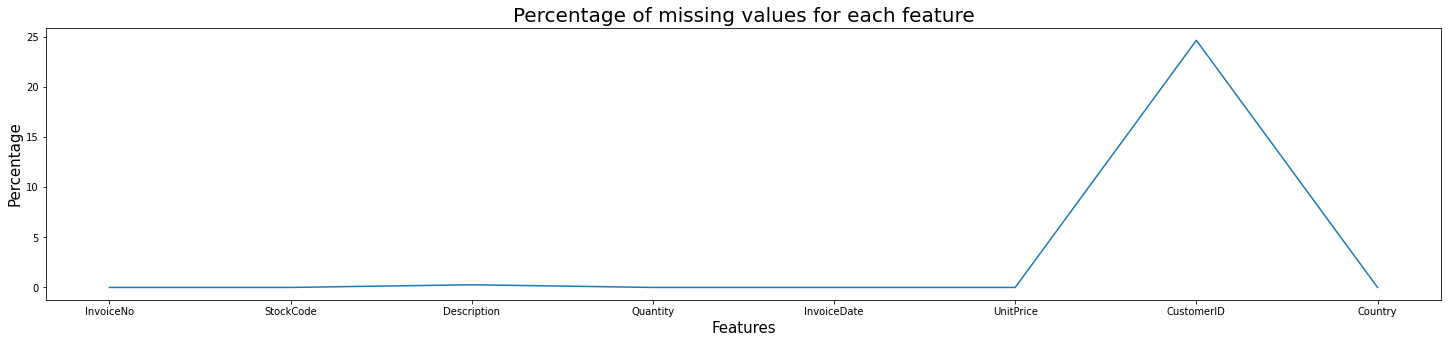

In [ ]:
# Plotting missing values of each feature
plt.figure(figsize=(25,5))
missing_percentages=uk_df.isnull().sum()*100/df.shape[0]
plt.plot(missing_percentages)
plt.title('Percentage of missing values for each feature',fontsize=20)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percentage',fontsize=15)

Derived Insight: The feature 'CustomerID' has more missing values

In [ ]:
# Taking the dataset where customerid is not null
uk_df=uk_df[~uk_df['CustomerID'].isnull()]

In [ ]:
# Checking for minimum in the feature "Quantity"
uk_df['Quantity'].min()

-80995

In [ ]:
# Checking for minimum in the feature "UnitPrice"
uk_df['UnitPrice'].min()

0.0

In [ ]:
# Taking the dataset where quantity is greater than zero
uk_df=uk_df[uk_df['Quantity']>0]

In [ ]:
# Creating new feature "TotalAmount"
uk_df['TotalAmount']=uk_df['Quantity']*uk_df['UnitPrice']

In [ ]:
uk_df.shape

(354345, 9)

In [ ]:
uk_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Creating other features "month" and "year" using "InvoiceDate"
uk_df['month']=uk_df['InvoiceDate'].dt.month
uk_df['year']=uk_df['InvoiceDate'].dt.year

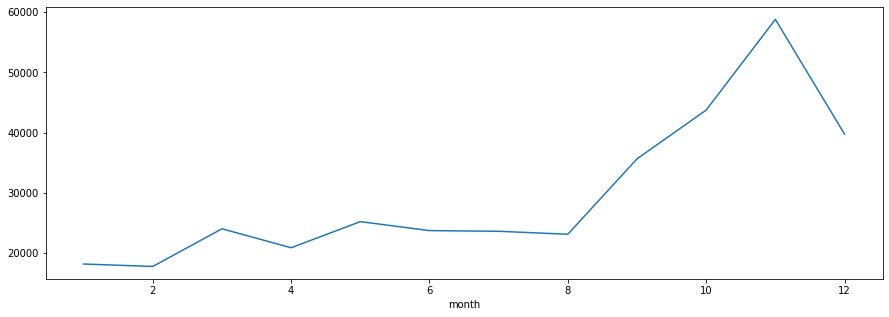

In [ ]:
# Plot for number of totalcustomers in each month
plt.figure(figsize=(15,5))
uk_df.groupby(['month'])['CustomerID'].aggregate('count').plot()

Derived Insight: More number of customers are observed in the month of November.

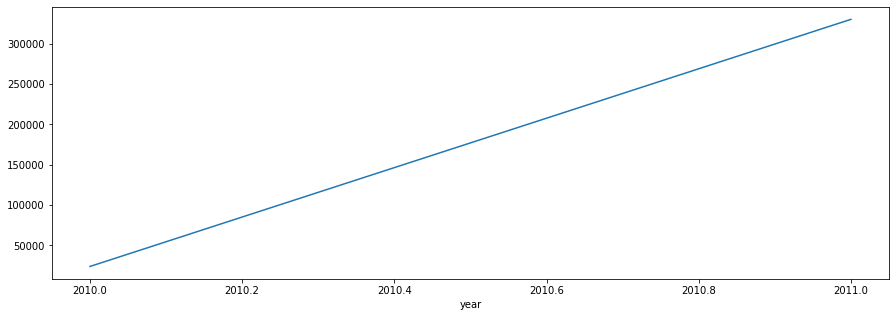

In [ ]:
# Plot of 'year' and 'CustomerID'
plt.figure(figsize=(15,5))
uk_df.groupby(['year'])['CustomerID'].aggregate('count').plot()

**Top Stocks sold in terms of their Quantity**

In [ ]:
pd.DataFrame(uk_df.groupby(['StockCode','Description'])['Quantity'].aggregate('sum')).reset_index().sort_values('Quantity',ascending=False).head(10)

,StockCode,Description,Quantity
2514,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2016,23166,MEDIUM CERAMIC TOP STORAGE JAR,76919
2690,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49182
3548,85099B,JUMBO BAG RED RETROSPOT,41981
3555,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34648
2795,84879,ASSORTED COLOUR BIRD ORNAMENT,32727
1031,22197,POPCORN HOLDER,28935
1426,22616,PACK OF 12 LONDON TISSUES,24337
37,17003,BROCADE RING PURSE,22711
356,21212,PACK OF 72 RETROSPOT CAKE CASES,22465


Derived Insight:	PAPER CRAFT , LITTLE BIRDIE has been sold the most in terms of quantity.

**Top Stocks sold in terms of TotalAmount**

In [ ]:
pd.DataFrame(uk_df.groupby(['StockCode','Description'])['TotalAmount'].aggregate('sum')).reset_index().sort_values('TotalAmount',ascending=False).head(10)


,StockCode,Description,TotalAmount
2514,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1239,22423,REGENCY CAKESTAND 3 TIER,110990.20
3555,85123A,WHITE HANGING HEART T-LIGHT HOLDER,94858.60
2016,23166,MEDIUM CERAMIC TOP STORAGE JAR,80291.44
3548,85099B,JUMBO BAG RED RETROSPOT,77371.57
2592,47566,PARTY BUNTING,63109.38
2795,84879,ASSORTED COLOUR BIRD ORNAMENT,52395.99
2658,79321,CHILLI LIGHTS,45505.31
925,22086,PAPER CHAIN KIT 50'S CHRISTMAS,40451.08
1314,22502,PICNIC BASKET WICKER 60 PIECES,39619.50


Derived Insight: PAPER CRAFT , LITTLE BIRDIE has been sold the most in terms of TotalAmount.

**Month and its unique customer count**

In [ ]:
unique_cust=pd.DataFrame(uk_df.groupby(['month'])['CustomerID'].unique()).rename(columns={'CustomerID':'unique_'})
unique_cust['cust_count']=unique_cust['unique_'].apply(lambda x:len(x))
unique_cust.sort_values(['cust_count'],ascending=False)

,unique_,cust_count
month,,
11,"[17733.0, 17419.0, 13461.0, 13697.0, 17389.0, ...",1506
10,"[16353.0, 16591.0, 16923.0, 15038.0, 17811.0, ...",1230
12,"[17850.0, 13047.0, 13748.0, 15100.0, 15291.0, ...",1157
9,"[13509.0, 13305.0, 16187.0, 17306.0, 13631.0, ...",1146
5,"[15606.0, 14800.0, 16931.0, 15708.0, 14304.0, ...",962
6,"[15643.0, 14842.0, 15124.0, 16422.0, 15240.0, ...",889
3,"[14620.0, 14740.0, 13880.0, 16462.0, 17068.0, ...",880
7,"[16317.0, 17865.0, 17667.0, 13534.0, 14868.0, ...",859
8,"[17941.0, 14947.0, 12921.0, 14060.0, 14239.0, ...",834


<Figure size 1080x360 with 0 Axes>

Derived Insight: Highest number of unique customers are observed in the month of November.

**Customers and their purchased amount in Descending order**

In [ ]:
pd.DataFrame(uk_df.groupby(['CustomerID'])['TotalAmount'].aggregate('sum')).reset_index().sort_values('TotalAmount',ascending=False).head(10)

,CustomerID,TotalAmount
3784,18102.0,259657.30
3315,17450.0,194550.79
2599,16446.0,168472.50
3357,17511.0,91062.38
2295,16029.0,81024.84
0,12346.0,77183.60
2767,16684.0,66653.56
903,14096.0,65164.79
621,13694.0,65039.62
1772,15311.0,60767.90


Derived Insight: The CustomerID '18102' has spent higher amount than other customers in UK.

**Totalamount spent by the customers, monthly in Descending order**

In [ ]:
pd.DataFrame(uk_df.groupby(['month'])['TotalAmount'].aggregate('sum')).reset_index().sort_values('TotalAmount',ascending=False)

,month,TotalAmount
10,11,980645.750
11,12,971046.020
9,10,824766.220
8,9,796780.272
4,5,551568.820
5,6,524915.480
7,8,498453.320
6,7,485612.251
2,3,467198.590
0,1,442190.060


Derived Insight: Customers in UK has spent Highest amount in November.

**Customers and their purchased quantities**

In [ ]:
pd.DataFrame(uk_df.groupby(['CustomerID'])['Quantity'].aggregate('sum')).reset_index().sort_values('Quantity',ascending=False).head(10)

,CustomerID,Quantity
2599,16446.0,80997
0,12346.0,74215
3315,17450.0,69993
3357,17511.0,64549
3784,18102.0,64124
621,13694.0,63312
1045,14298.0,58343
2767,16684.0,50255
2295,16029.0,40208
1772,15311.0,38194


Derived Insight: CustomerID '16446.0' has purchased highest number(80997) of quantities than other customers in UK.

# **Correlation Matrix**

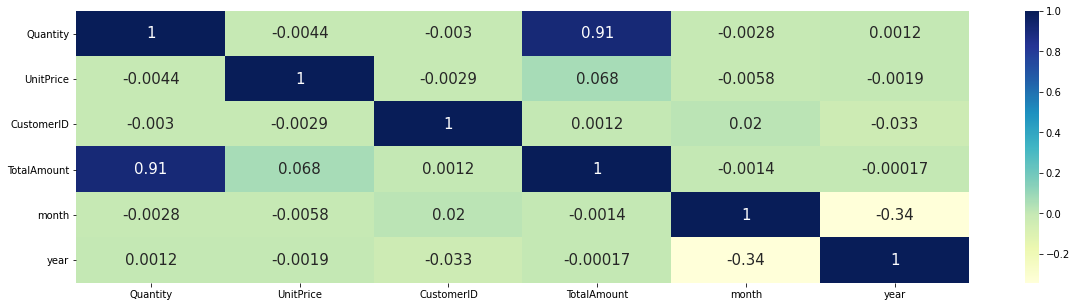

In [ ]:
corr_=uk_df.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr_,annot=True,cmap='YlGnBu',annot_kws={'size':15})

**Label Encoding the feature 'Description'**

In [ ]:
from sklearn.preprocessing import LabelEncoder
uk_df['Description']=LabelEncoder().fit_transform(uk_df['Description'])
uk_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,month,year
0,536365,85123A,3666,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,3674,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,851,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,1789,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,2736,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


## **Scaling,Normalizing and applying Principal Component Analysis**

In [ ]:
from sklearn.preprocessing import StandardScaler,normalize

X=uk_df.drop(['StockCode','InvoiceNo','Country','InvoiceDate'],axis=1)
 
std_scaler=StandardScaler().fit_transform(X.values)
clus_df=normalize(std_scaler)
clus_df

array([[ 3.48866301e-01, -7.11622368e-03, -5.18984747e-03, ...,
        -3.65904175e-03,  2.85345184e-01, -8.32213588e-01],
       [ 3.50330224e-01, -7.11212323e-03,  5.34247014e-03, ...,
        -1.95770757e-04,  2.85180764e-01, -8.31734057e-01],
       [-2.45492531e-01, -4.92729278e-03, -2.77371880e-03, ...,
         9.77280086e-04,  2.95167288e-01, -8.60859906e-01],
       ...,
       [ 4.14255354e-01,  2.83862652e-02, -4.33968834e-02, ...,
         1.30058351e-02,  5.76101649e-01,  1.21758495e-01],
       [ 3.00424871e-01,  2.81987764e-02,  1.50582317e-01, ...,
         2.67599634e-01,  5.72296547e-01,  1.20954291e-01],
       [-4.09650477e-01, -4.84024820e-03,  1.03667057e-01, ...,
         6.92309714e-02,  5.72983926e-01,  1.21099568e-01]])

In [ ]:
# PCA with n_components=2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(clus_df)
clus_df_pca = pca.transform(clus_df)
print("original shape:   ", clus_df.shape)
print("transformed shape:",clus_df_pca.shape)

original shape:    (354345, 7)
transformed shape: (354345, 2)


# **Use the KElbowVisualizer to find the optimal number of clusters  Koptimal .**

In [ ]:
!pip install yellowbrick

**For metric distortion**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f64bed58750>,
                 k=None, metric=None, model=None, timings=False)

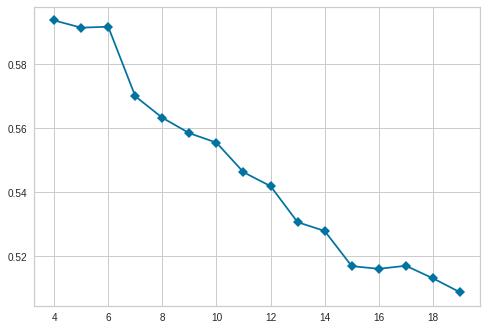

In [ ]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
# lst=['distortion','silhouette']
# for elem in lst:
  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,20), metric='distortion', timings=False,
)

visualizer.fit(clus_df_pca)    

**For metric silhouette**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b5b06690>,
                 k=None, metric=None, model=None, timings=False)

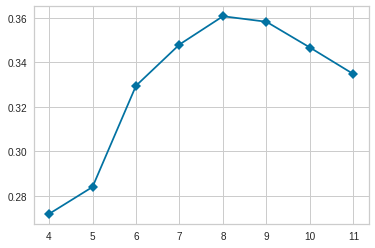

In [ ]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='silhouette', timings=False
)

visualizer.fit(clus_df)  

Derived Insight: Elbow observed at **n_clusters=8**

## **Silhouette score and visualization of the clustered data for n_clusters=[5,6,7,8,9]**

For n_clusters = 5 The average silhouette_score is : 0.38690053831660653
For n_clusters = 6 The average silhouette_score is : 0.3657098991115669
For n_clusters = 7 The average silhouette_score is : 0.39619394276372144
For n_clusters = 8 The average silhouette_score is : 0.38474940016288733
For n_clusters = 9 The average silhouette_score is : 0.3718582184384951


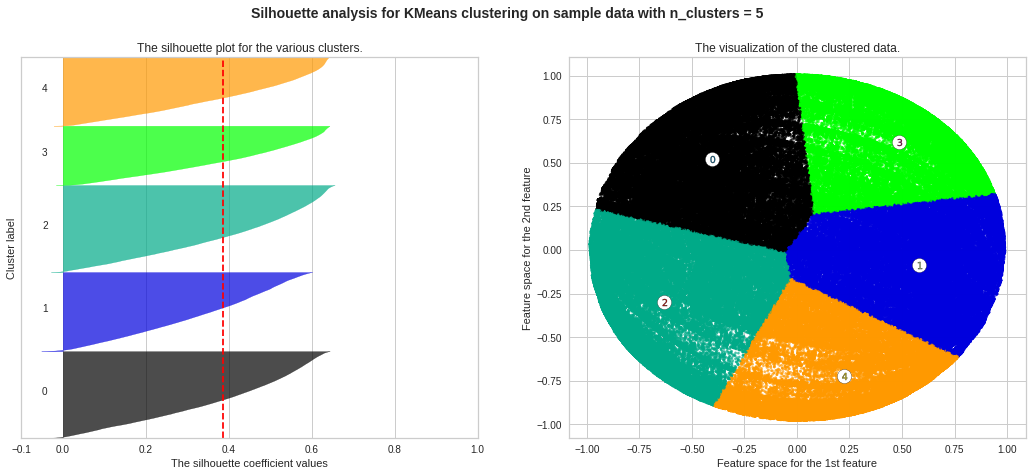

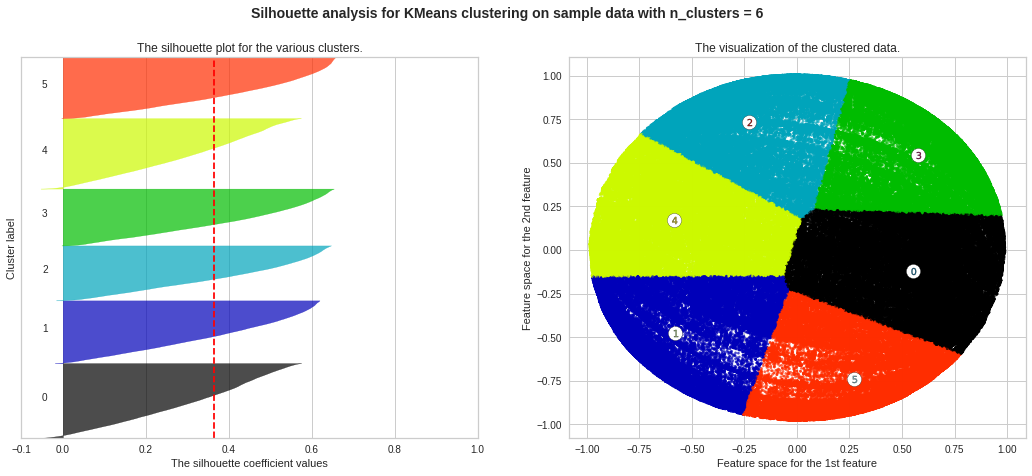

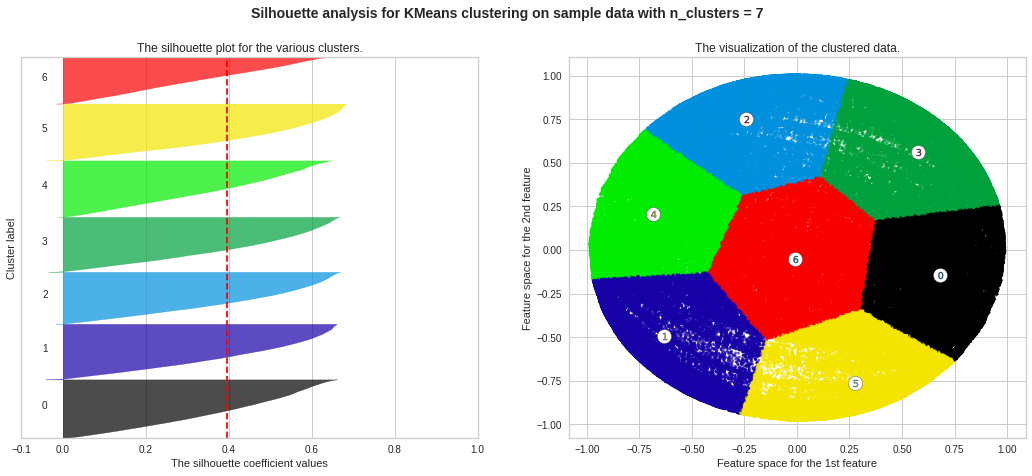

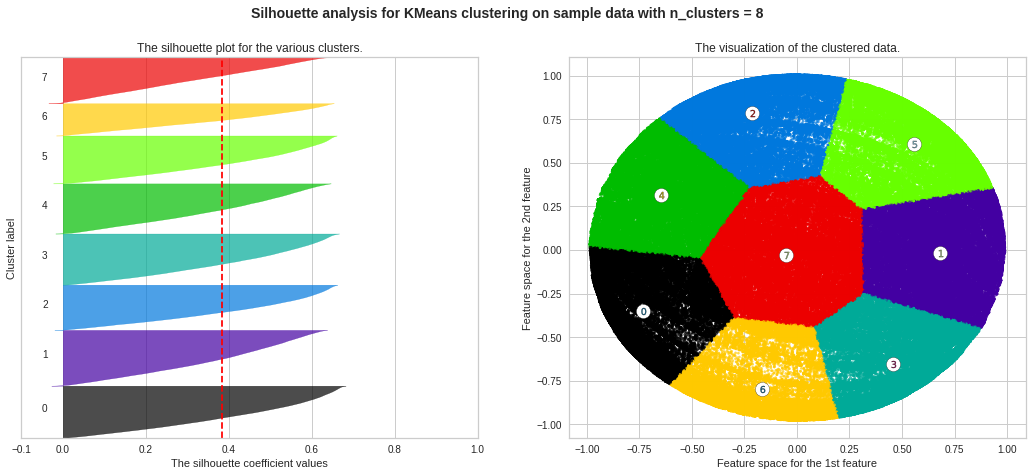

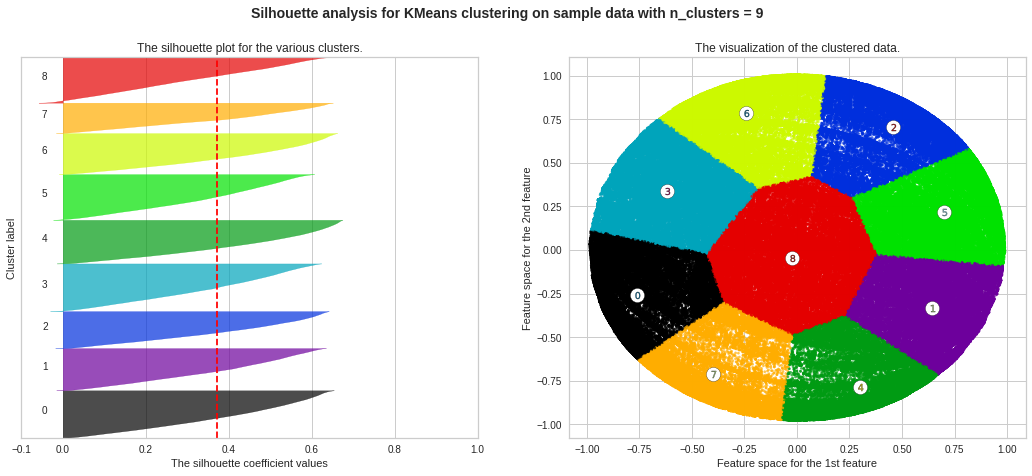

In [ ]:

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples


range_n_clusters = [5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(clus_df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(clus_df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(clus_df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clus_df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(clus_df_pca[:, 0],clus_df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Derived Insight: Highest average silhouette score observed with **n_clusters=7**

**Silhouette score and Visualization of the clustered data for n_clusters=[8,15,20]**

For n_clusters = 8 The average silhouette_score is : 0.3847494001628867
For n_clusters = 15 The average silhouette_score is : 0.3797178411418728
For n_clusters = 20 The average silhouette_score is : 0.37730492741920074


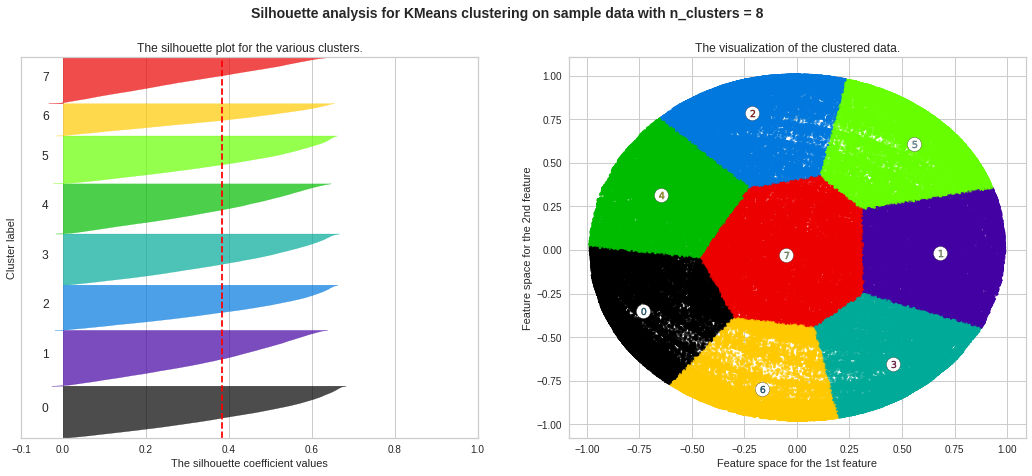

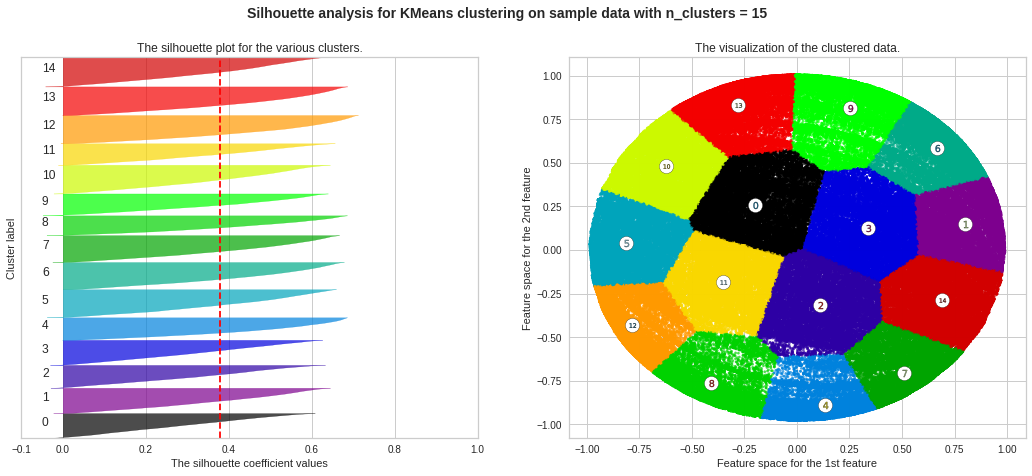

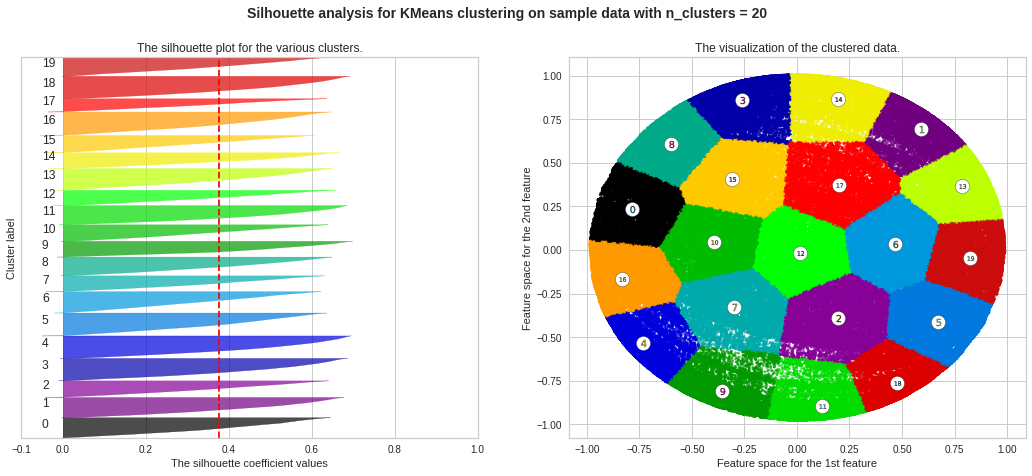

In [ ]:

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples


range_n_clusters = [8,15,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(clus_df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(clus_df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(clus_df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clus_df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(clus_df_pca[:, 0],clus_df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()